In [60]:
# Boston Housing Dataset
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# import the dataset
bhd = pd.read_csv(r"C:\Users\Ashish Kulkarni\Desktop\Data Science\Practice\Boston Dataset\BostonHousing.csv")

In [62]:
bhd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [63]:
bhd.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [64]:
bhd.shape

(506, 14)

In [65]:
bhd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [66]:
# check nulls
bhd.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [67]:
# fill null values
bhd.CRIM = bhd.CRIM.fillna(bhd.CRIM.median())
bhd.ZN = bhd.ZN.fillna(bhd.ZN.median())
bhd.INDUS = bhd.INDUS.fillna(bhd.INDUS.median())
bhd.CHAS = bhd.CHAS.fillna(bhd.CHAS.median())
bhd.AGE = bhd.AGE.fillna(bhd.AGE.median())
bhd.LSTAT = bhd.LSTAT.fillna(bhd.LSTAT.median())

In [68]:
# check nulls
bhd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

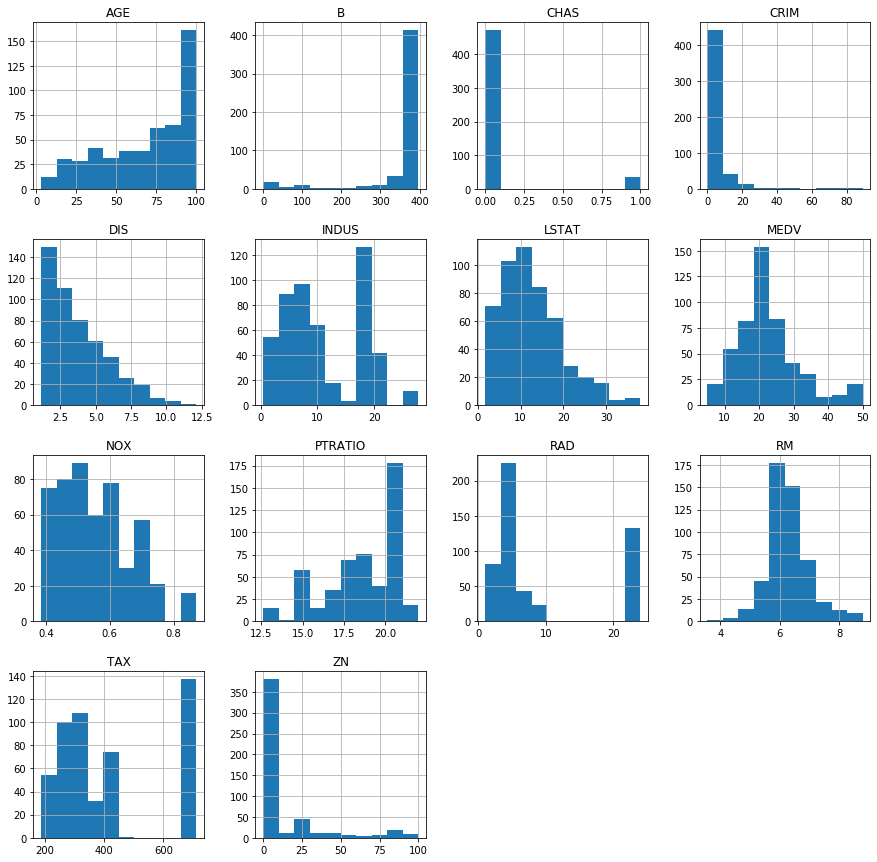

In [69]:
bhd.hist(figsize=(15,15))
plt.show()

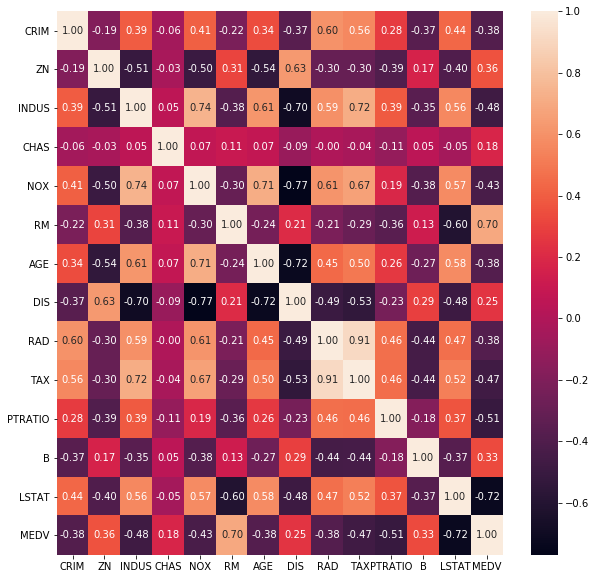

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(bhd.corr(), annot = True, fmt = '.2f')

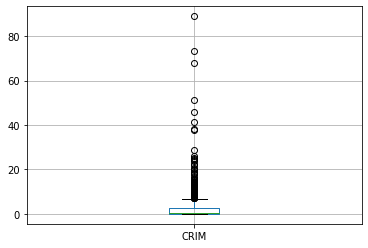

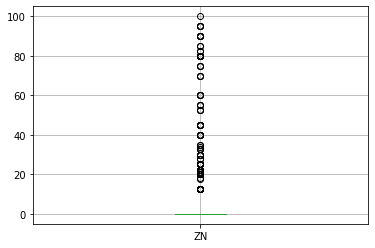

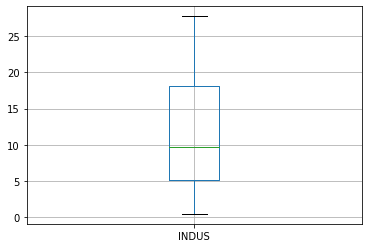

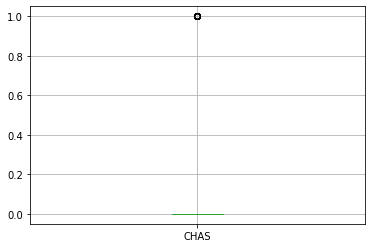

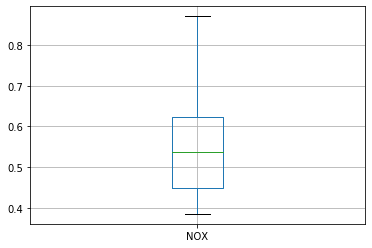

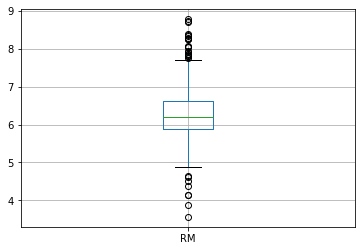

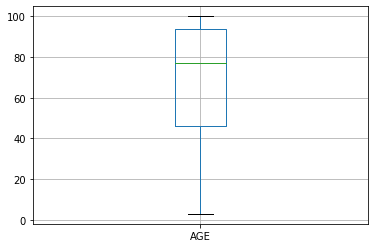

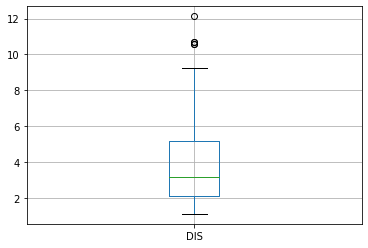

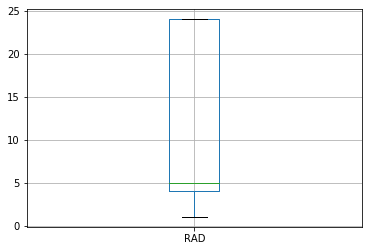

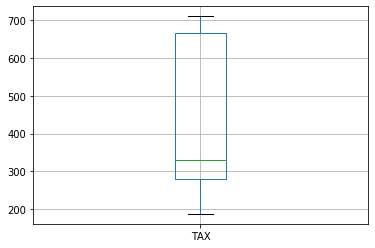

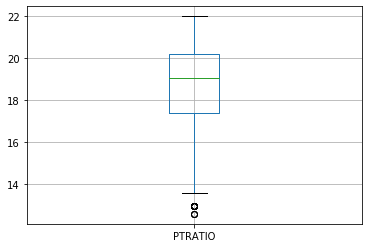

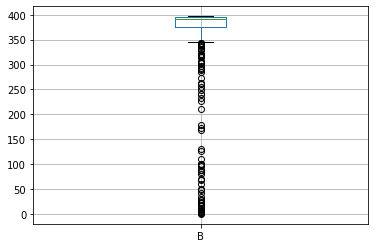

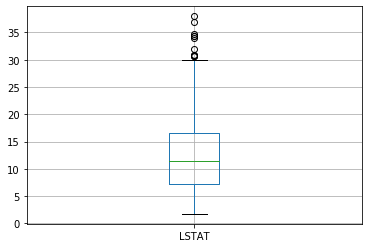

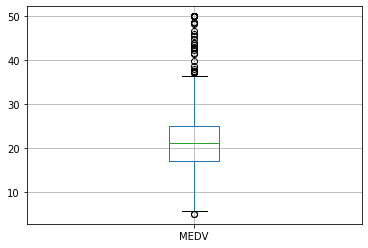

In [71]:
for i in bhd:
    plt.figure()
    bhd.boxplot([i])

In [72]:
# create a copy of the dataset
bhd1 = bhd.iloc[ : , : ]

## Model 1

In [73]:
# splitting and sampling the dataset
bhd1_x = bhd1.iloc[ : , 0:13 ]
bhd1_y = bhd1.iloc[ : , -1 ]

In [74]:
from sklearn.model_selection import train_test_split
bhd1_x_train, bhd1_x_test, bhd1_y_train, bhd1_y_test = train_test_split(bhd1_x, bhd1_y, test_size = .2, random_state = 555)

In [75]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [76]:
reg1.fit(bhd1_x_train, bhd1_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
pred_value1 = reg1.predict(bhd1_x_test)
pred_value1

array([20.57361855, 28.08611001, 20.75945559, 43.08535859,  5.95427111,
       31.59838293, 18.08435942,  8.16646716, 17.50601811, 35.44685943,
       25.04217385,  6.35812096, 25.46458924, 18.61571472, 29.96683667,
       14.53943205, 31.15504913, 28.59400145, 13.41404248, 17.4149029 ,
       30.44847762,  2.97557506, 19.56902206, 23.92139258, 26.88609643,
       18.63162917, 21.33606925, 23.80202379, 28.81438767, 15.35645503,
       33.17440223, 17.84844717, 13.79160748, 35.68306363, 25.55053164,
       13.5516601 , 23.00471603,  5.65858059, 19.50068052, 23.2080972 ,
       36.33812736, 23.99714571, 24.40106091, 28.22381909, 32.94542392,
       35.57154604, 20.31619937,  6.71618468, 21.01947782, 26.54536725,
       19.59659967, 22.39395671, 18.1654123 , 31.18585961, 20.65789118,
       39.15080924, 19.39265459, 17.89853497, 16.54845968, 18.74806169,
       19.72413072, 31.31257591, 14.77808822, 16.77641209, 28.25169314,
       19.98787096, 18.50720615,  5.8628801 , 17.96823432, 21.48

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(bhd1_y_test, pred_value1)
r_squared = r2_score(bhd1_y_test, pred_value1)
rmse = sqrt(mse)
print("mean squared value is ", mse)
print("root mean square value is ", rmse)
print("R_squared value is ", r_squared)

mean squared value is  19.928908821485873
root mean square value is  4.464180643912819
R_squared value is  0.7470652874660753


In [79]:
feature_importance = pd.DataFrame({"Features" : list(bhd1_x.columns), "Coeffitients" : list(reg1.coef_)})
feature_importance

,Features,Coeffitients
0,CRIM,-0.107780
1,ZN,0.034953
2,INDUS,-0.061317
3,CHAS,3.274260
4,NOX,-12.926050
5,RM,4.350909
6,AGE,-0.003765
7,DIS,-1.368465
8,RAD,0.256732
9,TAX,-0.009769


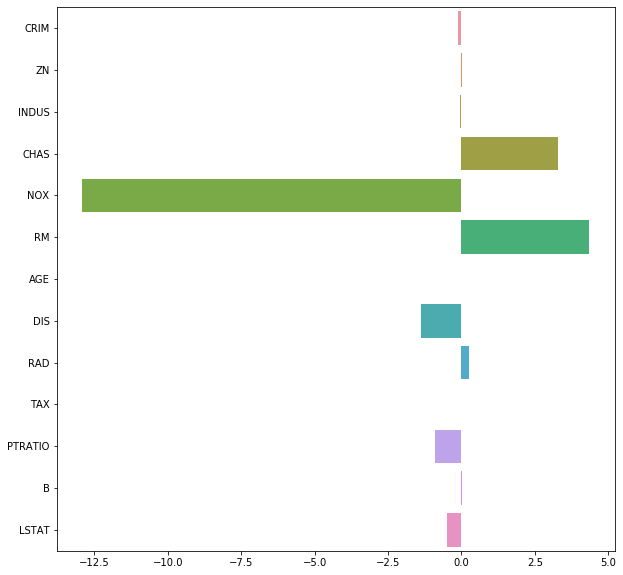

In [80]:
# barplot to identify important features
plt.figure(figsize=(10,10))
sns.barplot(x=list(reg1.coef_), y=list(bhd1_x.columns), orient='h')

------

## Model 2

In [81]:
bhd2 = bhd1.drop(["B", "TAX", "AGE", "INDUS", "ZN", "CRIM"], axis = 1)

In [82]:
bhd2.head()

,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.0,0.538,6.575,4.0900,1,15.3,4.98,24.0
1,0.0,0.469,6.421,4.9671,2,17.8,9.14,21.6
2,0.0,0.469,7.185,4.9671,2,17.8,4.03,34.7
3,0.0,0.458,6.998,6.0622,3,18.7,2.94,33.4
4,0.0,0.458,7.147,6.0622,3,18.7,11.43,36.2


In [83]:
bhd2_x = bhd2.iloc[ : , 0:7 ]
bhd2_y = bhd2.iloc[ : , -1 ]

In [84]:
bhd2_x_train, bhd2_x_test, bhd2_y_train, bhd2_y_test = train_test_split(bhd2_x, bhd2_y, test_size = .2, random_state = 555)

In [85]:
reg2 = LinearRegression()

In [86]:
reg2.fit(bhd2_x_train, bhd2_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
pred_value2 = reg2.predict(bhd2_x_test)
pred_value2

array([20.47450677, 28.24020411, 20.51266456, 40.6185664 ,  3.05514882,
       31.13194708, 18.3309578 ,  6.18529991, 18.60000792, 33.68051116,
       24.60588905,  4.32800718, 26.06030428, 18.18928577, 29.29046117,
       13.79136262, 32.1850196 , 29.32952276, 11.96717732, 19.311935  ,
       30.04748655,  2.16912205, 17.982734  , 24.46729983, 26.72067913,
       17.30894306, 20.89457165, 24.06694697, 28.88472166, 17.54299771,
       32.86717944, 16.54498046, 17.33767767, 34.84576455, 25.61114572,
       11.96663295, 21.91124138,  4.16122382, 18.7689524 , 23.23381553,
       36.52495467, 22.66880697, 25.51628411, 28.46355018, 33.11953094,
       34.05200509, 20.56460684,  7.15783227, 22.22826804, 26.70288169,
       19.45885701, 21.32184747, 16.96505082, 30.38118417, 19.21378108,
       39.38902622, 16.95736555, 16.43577215, 17.97376856, 17.97801575,
       18.79016893, 29.17231544, 15.45596015, 15.68816333, 28.25284025,
       18.85287631, 18.46674983,  6.220776  , 17.4526599 , 23.27

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse2 = mean_squared_error(bhd2_y_test, pred_value2)
r_squared2 = r2_score(bhd2_y_test, pred_value2)
rmse2 = sqrt(mse2)
print("mean squared value is ", mse2)
print("root mean square value is ", rmse2)
print("R_squared value is ", r_squared2)

mean squared value is  21.614614614209444
root mean square value is  4.649152031737556
R_squared value is  0.7256705631528391


### Model 1 in performing better than model 2
Try to remove one or two features every time you build the model. For now, its ok.

In [89]:
# find an automated technique to find r2 and adj r2
# build ridge and lasso
# do GridSearchCV on linear regression model 1

## Model 3 implementing Ridge using all the features

In [90]:
from sklearn.linear_model import Ridge
ridge1 = Ridge()

In [91]:
ridge1.fit(bhd1_x_train, bhd1_y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
pred_ridge1 = ridge1.predict(bhd1_x_test)
pred_ridge1

array([20.63737457, 28.37223331, 20.68182002, 42.95727112,  5.60585301,
       31.67668457, 17.7996183 ,  8.09908636, 17.91182008, 35.66703151,
       25.33432851,  6.27898013, 25.61445831, 18.66477963, 29.77439498,
       15.24669045, 31.16923378, 28.78667386, 12.79655547, 17.62313973,
       30.56519686,  2.90442466, 20.17136715, 23.72677671, 26.67163619,
       19.03473051, 21.25430756, 23.8865936 , 29.06047771, 15.6920392 ,
       32.86665625, 17.93810828, 13.35122819, 35.57863557, 25.76766895,
       13.30519499, 22.64152884,  5.63085575, 19.23502337, 23.18488489,
       36.1170397 , 24.53402624, 24.26558659, 28.12998217, 32.65059437,
       35.79724139, 20.46433395,  6.67811137, 20.60384041, 26.84528329,
       19.45926038, 22.07691686, 18.20567179, 31.03061976, 20.74052191,
       39.14763375, 19.46622662, 18.12869149, 17.50252649, 18.83115897,
       20.13350965, 31.68458716, 14.77555757, 16.26945356, 28.12178553,
       19.62173808, 18.66482258,  6.01405909, 17.96949327, 21.10

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse3 = mean_squared_error(bhd1_y_test, pred_ridge1)
r_squared3 = r2_score(bhd1_y_test, pred_ridge1)
rmse3 = sqrt(mse3)
print("mean squared value is ", mse3)
print("root mean square value is ", rmse3)
print("R_squared value is ", r_squared3)


mean squared value is  20.68872060834442
root mean square value is  4.54848552909036
R_squared value is  0.7374218705780539


### model1 is still better performing model

## Model 4 implementing Lasso using all the features

In [94]:
from sklearn.linear_model import Lasso
lasso1 = Lasso()

In [95]:
lasso1.fit(bhd1_x_train, bhd1_y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
pred_lasso1 = lasso1.predict(bhd1_x_test)
pred_lasso1

array([23.0069667 , 28.31254249, 20.54237474, 39.17335573,  4.86302676,
       30.92163943, 18.9429354 ,  7.63460706, 22.20545476, 32.71358484,
       28.23872304,  7.03524249, 26.73804285, 19.91163282, 29.33186587,
       20.92550891, 30.65678216, 28.36595739, 11.29035513, 16.41097704,
       30.35274694,  5.07522708, 20.7533268 , 24.32648361, 23.99166487,
       19.17301556, 22.78832403, 27.21816403, 29.57039878, 15.37298631,
       28.0454151 , 21.13328316, 13.25254677, 31.86709929, 26.60622197,
       13.02788831, 23.34432832,  5.76586163, 19.24147789, 24.67395155,
       34.89440154, 21.81106227, 25.34189267, 28.00351316, 31.1674188 ,
       35.06332046, 22.96704981,  6.50547626, 21.10860427, 27.23920607,
       19.54937361, 20.69743335, 16.80721212, 31.30186187, 19.49626117,
       35.19094679, 19.63284873, 17.98515671, 20.42493181, 19.90914144,
       22.86583992, 32.02465018, 13.3939304 , 15.08726142, 28.09261006,
       18.91975687, 20.65202544,  3.80398169, 18.5016896 , 20.24

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse4 = mean_squared_error(bhd1_y_test, pred_lasso1)
r_squared4 = r2_score(bhd1_y_test, pred_lasso1)
rmse4 = sqrt(mse4)
print("mean squared value is ", mse4)
print("root mean square value is ", rmse4)
print("R_squared value is ", r_squared4)

mean squared value is  23.35149008502118
root mean square value is  4.8323379522774665
R_squared value is  0.7036264009835911


### model 1 still is the better performing model
Do GridSearchCV on it

In [98]:
# find an automated technique to find r2 and adj r2
# do GridSearchCV on linear regression model 1

## Using Grid SearchCV 

## Model 4

In [99]:
from sklearn.model_selection import GridSearchCV
reg4 = LinearRegression()

In [100]:
parameters = [{'fit_intercept' : ['True', 'False', 'bool', 'optional'], 
                               'normalize' : ['False', 'True', 'bool', 'optional'],
                               'copy_X': ['False', 'True', 'bool', 'optional']}]
grid_search4 = GridSearchCV(reg4,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)

In [101]:
grid_search4.fit(bhd1_x_train, bhd1_y_train)

ValueError: continuous is not supported